**Data:**

The data used in this project is from an anonymous organisation’s social media ad campaign.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-conversion/KAG_conversion_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/sales-conversion/KAG_conversion_data.csv')

In [3]:
df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
0            7350       1    1.430000                 2                    1  
1           17861       2    1.820000                 2                    0  
2             693       0    0.000000                 1                    0  
3            4259       1    1.250000                 1                    0  
4            4133       1    1.290000                 1                    1  
...           ...     ...         ...               ...                  ...  
1138      1129773     252  358.189997                13                    2  
1139       637549     120  173.880003                 3                    0  
1140       151531      28   40.289999                 2                    0  
1141       790253     135  198.710001                 8                    2  
1142       513161     114  165.609999                 5                    2  

[1143 rows x 11 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.describe()

ad_id  xyz_campaign_id  fb_campaign_id     interest  \
count  1.143000e+03      1143.000000     1143.000000  1143.000000   
mean   9.872611e+05      1067.382327   133783.989501    32.766404   
std    1.939928e+05       121.629393    20500.308622    26.952131   
min    7.087460e+05       916.000000   103916.000000     2.000000   
25%    7.776325e+05       936.000000   115716.000000    16.000000   
50%    1.121185e+06      1178.000000   144549.000000    25.000000   
75%    1.121804e+06      1178.000000   144657.500000    31.000000   
max    1.314415e+06      1178.000000   179982.000000   114.000000   

        Impressions       Clicks        Spent  Total_Conversion  \
count  1.143000e+03  1143.000000  1143.000000       1143.000000   
mean   1.867321e+05    33.390201    51.360656          2.855643   
std    3.127622e+05    56.892438    86.908418          4.483593   
min    8.700000e+01     0.000000     0.000000          0.000000   
25%    6.503500e+03     1.000000     1.480000          1.000000   
50%    5.150900e+04     8.000000    12.370000          1.000000   
75%    2.217690e+05    37.500000    60.025000          3.000000   
max    3.052003e+06   421.000000   639.949998         60.000000   

       Approved_Conversion  
count          1143.000000  
mean              0.944007  
std               1.737708  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max              21.000000

In [6]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

profile.to_notebook_iframe() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Major insights gained by this report:
#### 1) The campaign_id are of three types with code 916, 936, 1178 and majority samples have campaign_id=1178. 
#### 2) The Age Group of 30-34 had seen the most amount of ad's
#### 3) The number of male and female users are nearly same(592 male and 551 female).
#### 4) Some features like clicks, impressions and spent are highly correlated.
#### 5) The distributions of features like impressions, clicks, spent, total_conversions and approved_conversions are similar.

### Below are further validation of these insights: 

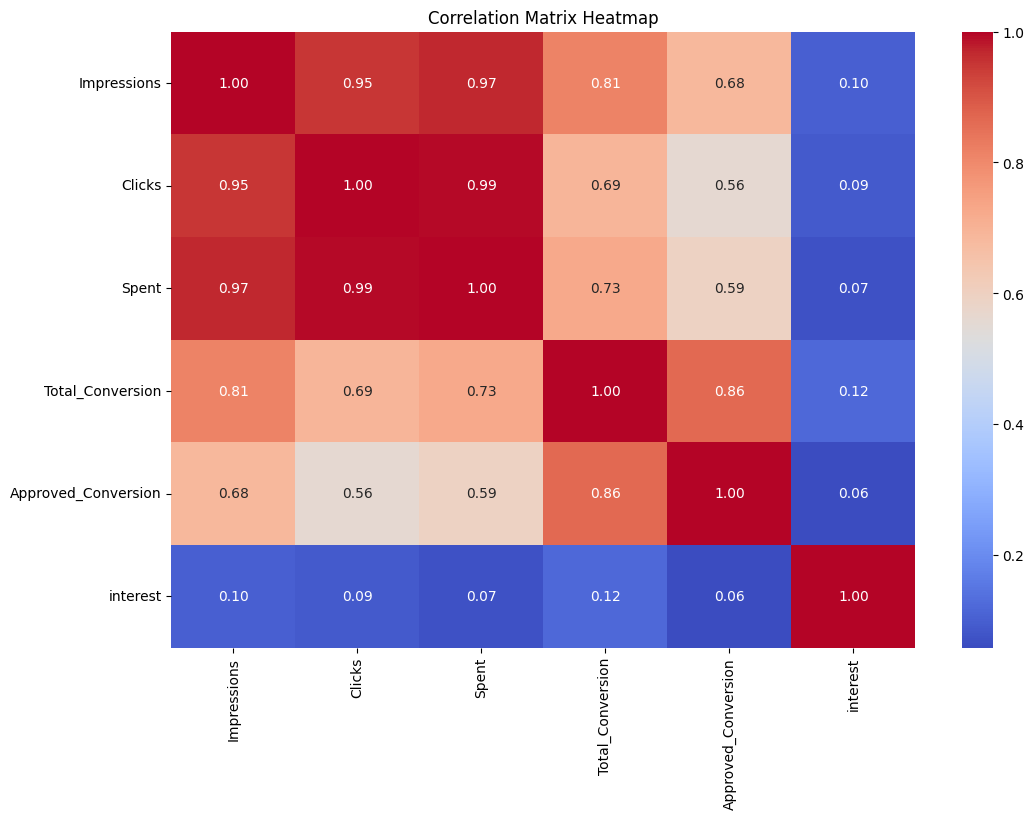

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion","interest"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Here, it can be seen that the columns are quite correlated with each other.

In [8]:
df.replace({"xyz_campaign_id" : {916:"Campaign_1",936:"Campaign_2",1178:"Campaign_3"}}, inplace=True)
df.head()

ad_id xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746      Campaign_1          103916  30-34      M        15   
1  708749      Campaign_1          103917  30-34      M        16   
2  708771      Campaign_1          103920  30-34      M        20   
3  708815      Campaign_1          103928  30-34      M        28   
4  708818      Campaign_1          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

### From now onwards,
**campaign_id = 916 is named as 'Campaign_1'**

**campaign_id = 936 is named as 'Campaign_2'** 

**campaign_id = 1178 is named as 'Campaign_3'**

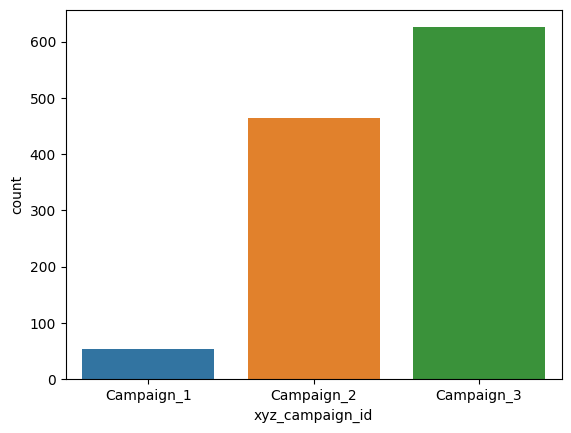

In [9]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show() 

#### Campaign_3 showed the most ad's

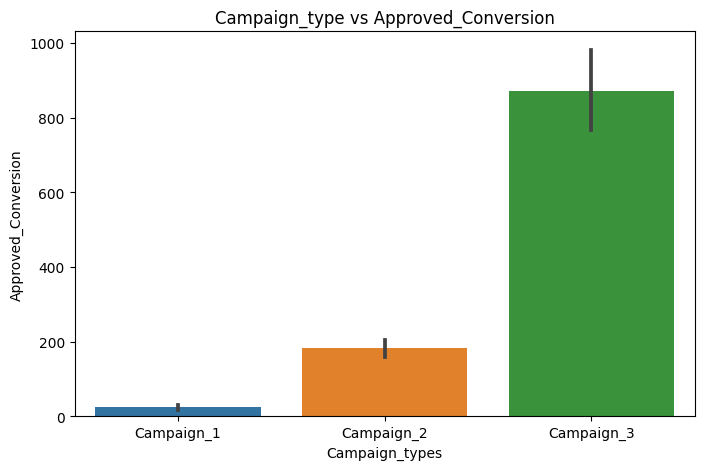

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], estimator="sum", ax=ax)

# Add labels and title
ax.set_xlabel('Campaign_types')
ax.set_ylabel('Approved_Conversion')
ax.set_title('Campaign_type vs Approved_Conversion')

plt.show()



### Campaign_3 had a great Approved Conversion while Campaign_1 showed good Approved Conversion given that it had very less number of ad's

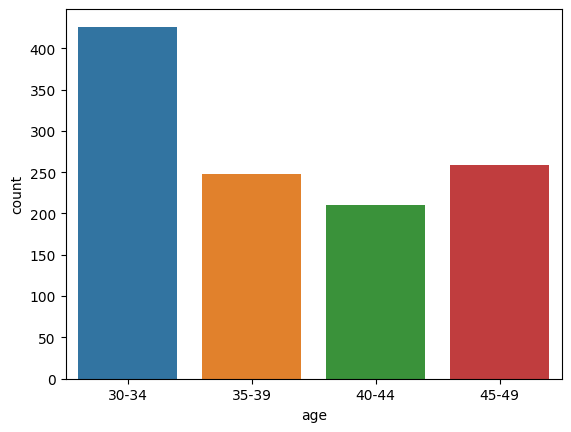

In [11]:
sns.countplot(x ='age', data = df) 
plt.show() 

### The Age Group of 30-34 had seen the most amount of ad's

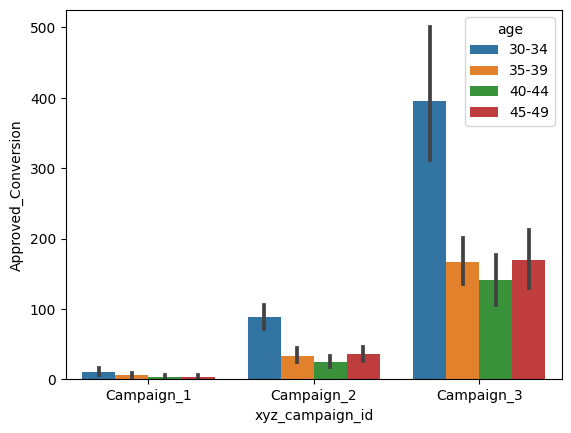

In [12]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], estimator="sum", data=df)
plt.show()

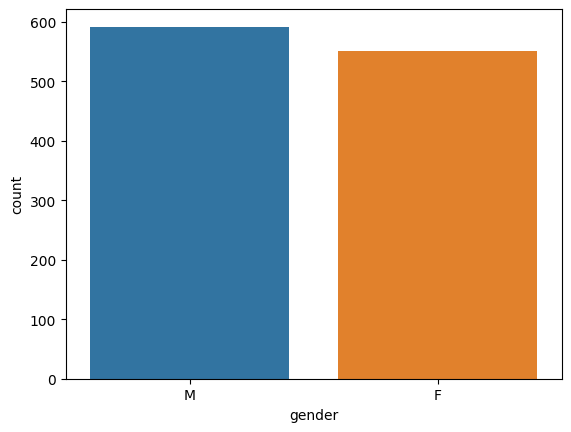

In [13]:
sns.countplot(x ='gender', data = df)  
plt.show() 

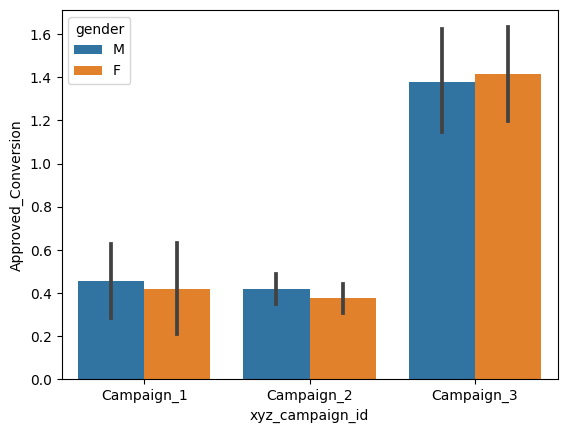

In [14]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=df)
plt.show()

### Both the genders i.e. Male and Female had nearly equal contribution

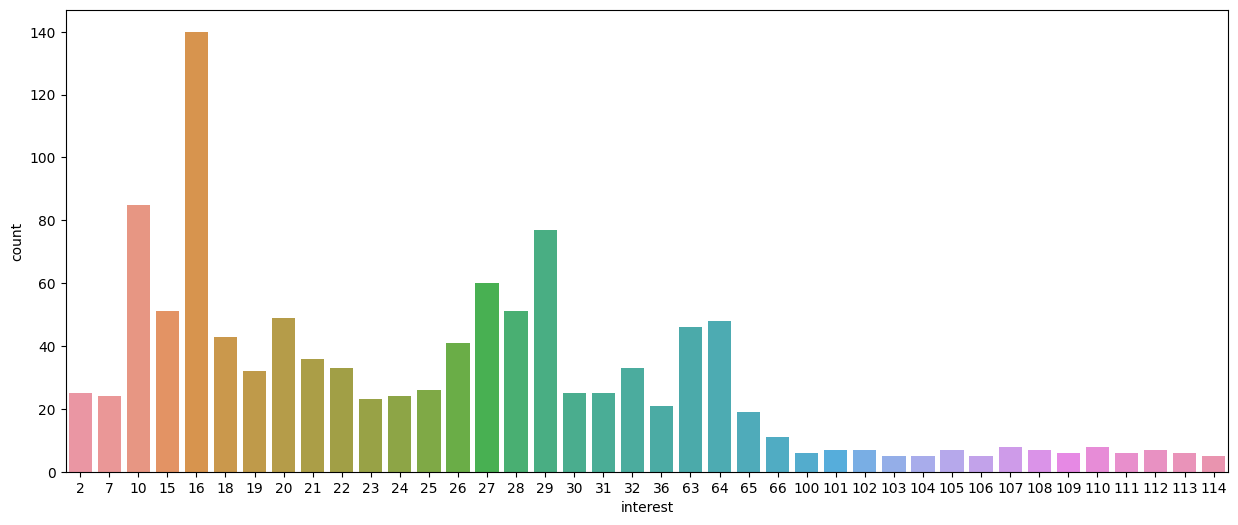

In [15]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x ='interest', data = df) 
plt.show() 

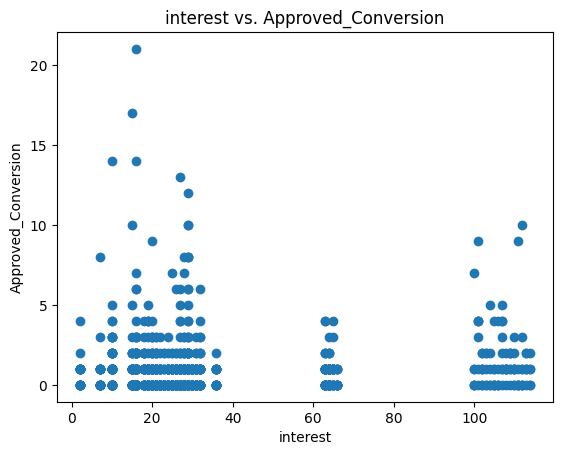

In [16]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

### Here, an interesting fact is that although the count of users, with interest code greater than 100, is less, there is a rise of users who actually bought the product

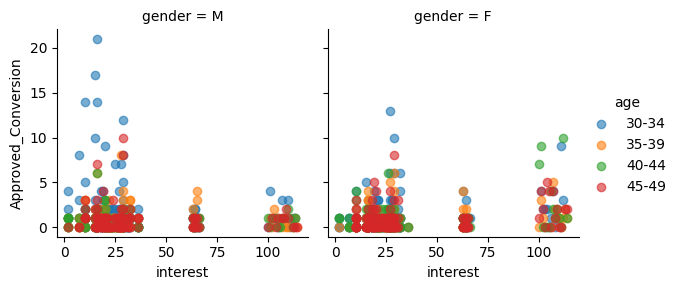

In [17]:
g = sns.FacetGrid(df, col="gender",hue = 'age')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=0.6)
g.add_legend()
plt.show()

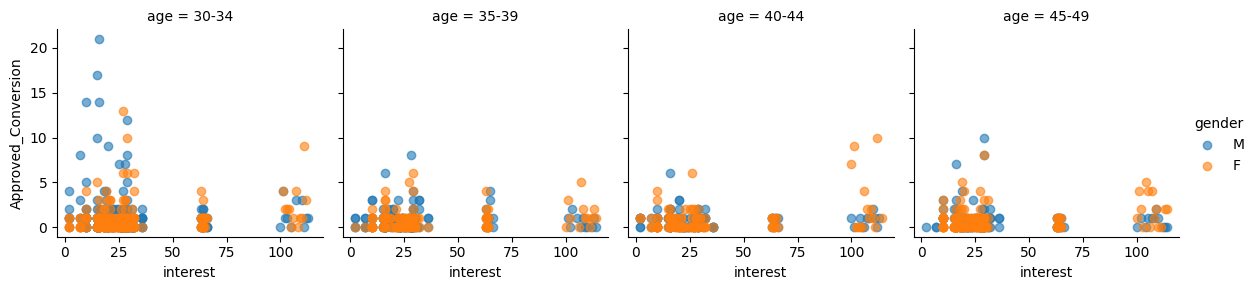

In [18]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=0.6)
g.add_legend()
plt.show()

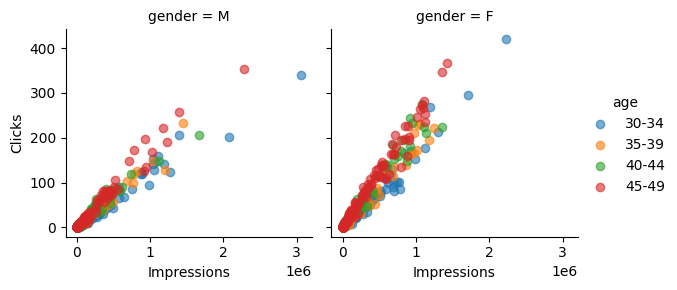

In [19]:
g = sns.FacetGrid(df,col = 'gender',hue = 'age')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.6)
g.add_legend()
plt.show()

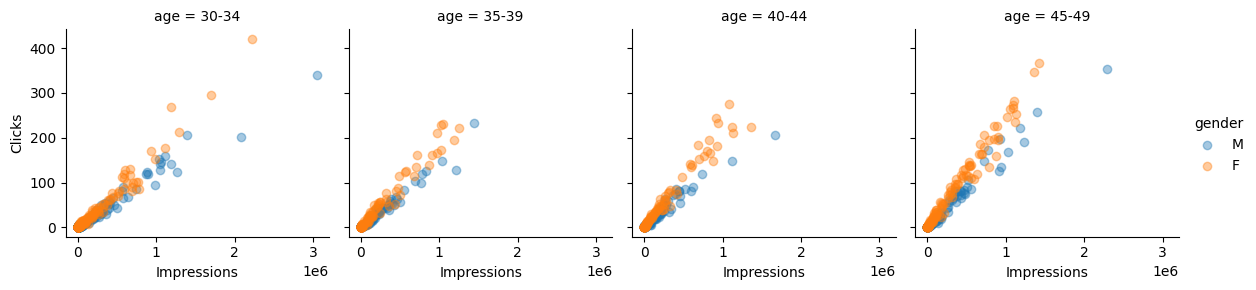

In [20]:
g = sns.FacetGrid(df,col = 'age',hue = 'gender')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.4)
g.add_legend()
plt.show()

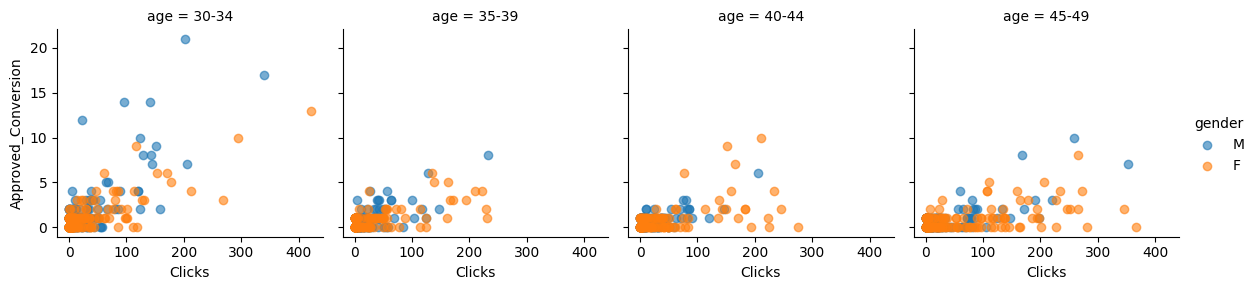

In [21]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=0.6)
g.add_legend()
plt.show()

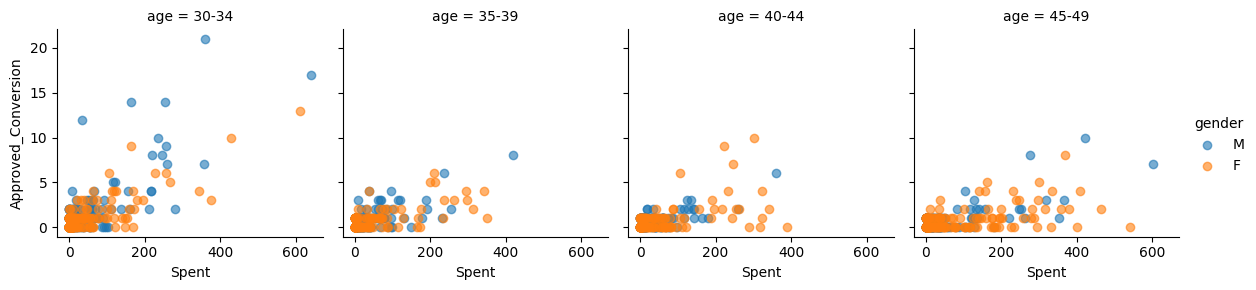

In [22]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=0.6)
g.add_legend()
plt.show()

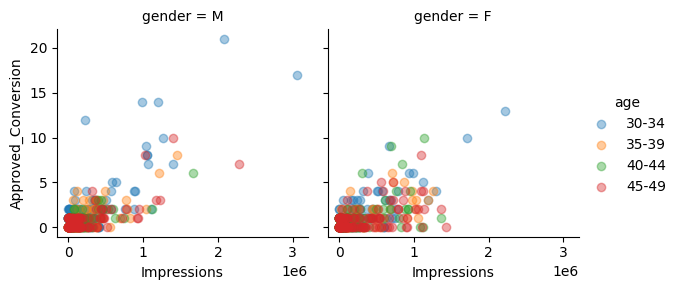

In [23]:
g = sns.FacetGrid(df, col="gender",hue= 'age')
g.map(plt.scatter, "Impressions", "Approved_Conversion", alpha=.4)
g.add_legend()
plt.show()

# SUMMARY
**Correlations:** All the columns are fairly correlated with each other.

**Campaign_3:**
1. Campaign_3 has most number of ads.
2. Campaign_3 has best Approved_conversion count.

**Age_group:** For all campaigns type, the age group of 40-44 shows most interest.

**Gender:** Both the genders shows similar interests in all three campaigns.

**Interest:** Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

**Product bought after clicking the ad:**
* It seems female tend to click more than male users upon seeing ads but no strict relationship can be drawn between approved conversions and clicks or spent. 
* People in age group 30-34 has more tendency to buy product after clicking the add.

In [24]:
from sklearn.preprocessing import LabelEncoder
df.replace({"xyz_campaign_id" : {"Campaign_1":916 ,"Campaign_2":936 ,"Campaign_3":1178}}, inplace=True)
encoder=LabelEncoder()
encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])
encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])

/tmp/ipykernel_138/212678900.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"xyz_campaign_id" : {"Campaign_1":916 ,"Campaign_2":936 ,"Campaign_3":1178}}, inplace=True)


In [25]:
x=pd.DataFrame(df.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(df["Total_Conversion"])

In [26]:
x

ad_id  xyz_campaign_id  fb_campaign_id  age  gender  interest  \
0      708746              916          103916    0       1        15   
1      708749              916          103917    0       1        16   
2      708771              916          103920    0       1        20   
3      708815              916          103928    0       1        28   
4      708818              916          103928    0       1        28   
...       ...              ...             ...  ...     ...       ...   
1138  1314410             1178          179977    3       0       109   
1139  1314411             1178          179978    3       0       110   
1140  1314412             1178          179979    3       0       111   
1141  1314414             1178          179981    3       0       113   
1142  1314415             1178          179982    3       0       114   

      Impressions  Clicks       Spent  
0            7350       1    1.430000  
1           17861       2    1.820000  
2             693       0    0.000000  
3            4259       1    1.250000  
4            4133       1    1.290000  
...           ...     ...         ...  
1138      1129773     252  358.189997  
1139       637549     120  173.880003  
1140       151531      28   40.289999  
1141       790253     135  198.710001  
1142       513161     114  165.609999  

[1143 rows x 9 columns]

In [27]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [28]:
from sklearn.model_selection import train_test_split , KFold
from scipy import stats

from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

def objective(trial):
    params = {
        "subsample": trial.suggest_discrete_uniform("subsample", 0.6,1,0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6,1,0.1),
        "eta": trial.suggest_loguniform("eta",1e-2,0.1),
        "gamma": trial.suggest_loguniform("gamma",0.05,1),
        "max_depth": trial.suggest_categorical("max_depth",[5,7,9,11,13]),
        "min_child_weight": trial.suggest_int("min_child_weight",5,11),
        "random_state": 2024
    }
    return(return_rmse(params)) 






In [29]:
import re
def return_rmse(params):
    model = xgb.train(params , dtrain, num_boost_round = 20, evals = [(dtest, 'eval')],
          early_stopping_rounds=20,verbose_eval = 0)
    result = model.eval(dtest)
    result = float(re.search(r'[\d.]+$',result).group(0))
    print(result)
    return(result)

In [30]:
import optuna
from optuna.samplers import TPESampler

# Create a study object
study1 = optuna.create_study(direction='minimize', sampler=TPESampler())

# Run the optimization
study1.optimize(objective, n_trials=200, show_progress_bar=True)


[I 2024-08-17 18:39:38,708] A new study created in memory with name: no-name-47e0aedb-f4fe-4df9-a8f3-b44c6905f6fc


  0%|          | 0/200 [00:00<?, ?it/s]

/tmp/ipykernel_138/2183682028.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  "subsample": trial.suggest_discrete_uniform("subsample", 0.6,1,0.1),
/tmp/ipykernel_138/2183682028.py:10: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6,1,0.1),
/tmp/ipykernel_138/2183682028.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "eta": trial.suggest_loguniform("eta",1e-2,0.1),
/tmp/ipykernel_138/2183682028.py:12: FutureWarning: sugg

3.0620679235569748
[I 2024-08-17 18:39:38,780] Trial 0 finished with value: 3.0620679235569748 and parameters: {'subsample': 0.7, 'colsample_bytree': 0.8, 'eta': 0.026392188526685272, 'gamma': 0.05406490329416959, 'max_depth': 13, 'min_child_weight': 6}. Best is trial 0 with value: 3.0620679235569748.
3.1097826441271565
[I 2024-08-17 18:39:38,817] Trial 1 finished with value: 3.1097826441271565 and parameters: {'subsample': 0.7, 'colsample_bytree': 1.0, 'eta': 0.02890061595314437, 'gamma': 0.15306434678791447, 'max_depth': 13, 'min_child_weight': 10}. Best is trial 0 with value: 3.0620679235569748.
2.42569875933594
[I 2024-08-17 18:39:38,862] Trial 2 finished with value: 2.42569875933594 and parameters: {'subsample': 0.8, 'colsample_bytree': 1.0, 'eta': 0.051698307958871544, 'gamma': 0.37750027026087474, 'max_depth': 7, 'min_child_weight': 6}. Best is trial 2 with value: 2.42569875933594.
3.6938334312631116
[I 2024-08-17 18:39:38,893] Trial 3 finished with value: 3.6938334312631116 and

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score
xgb_model = xgb.XGBRegressor(**(study1.best_params))

xgb_model.fit(X_train, y_train, early_stopping_rounds=7, eval_set=[(X_test, y_test)], verbose=0)

y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

acc = r2_score(y_test, y_pred_xgb)
print("MAE: ", mae_xgb)
print('R2 score: ', acc)

MAE:  0.9361477561913203
R2 score:  0.7956772756990098


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
